In [1]:
import pandas as pd
import onsetsync

Here, we will demonstrate the use of essential data loading and annotation functions using examples from the IEMP dataset. These functions are designed to streamline loading data in a format that makes it convenient to conduct synchrony analysis.  

Functions Overview
    
    get_df_csv()

Loads single or multiple CSV or TXT files into a DataFrame.  

    add_beatsd()

Adds beat-subdivisions annotation columns to the DataFrame, such as 1.1, 1.2, ... 4.3, 4.4 from 1, 2, ... 15, 16, etc. 

    add_cycle()

Add a 'Cycle' column to the DataFrame based on the 'SD' column values. Accepts SD, Beat.SD and label SD formats.
    
    add_annotation()

Adds cycle label and corresponding cycle start time annotation columns to the DataFrame.   

    add_isobeats()

Adds isochronous times or mean onset times to the DataFrame.  



### 1. Load Data

#### File Paths

In [2]:
# Cuban Son Salsa Example
onsets_path_css = 'example_data/CSS_Song2_Onsets_Selected.csv'
metre_path_css = 'example_data/CSS_Song2_Metre.csv'

# Candombe Example
onsets_path_uc = 'example_data/UC_311_Onsets_Selected.csv'
metre_path_uc = 'example_data/UC_311_Metre.csv'

# Malian Djembe Example
onsets_path_mj = 'example_data/MJ_Maraka_1_Onsets_Selected.csv'
metre_path_mj = 'example_data/MJ_Maraka_1_Metre.csv'

#### List available column names in the csv

In [7]:
'''
CSS_Song2 = pd.read_csv(onsets_path_css)
print('CSS Columns:', CSS_Song2.columns, '\n')

UC_311 = pd.read_csv(onsets_path_uc)
print('UC Columns:', UC_311.columns, '\n')

MJ_1 = pd.read_csv(onsets_path_mj)
print('MJ Columns:', MJ_1.columns)
'''

CSS Columns: Index(['Piece', 'Label SD', 'SD', 'Clave_?', 'Section', 'Isochronous.SD.Time',
       'Clave', 'Bass ', 'Guitar', 'Tres', 'Bongo', 'Bell', 'Cajon', 'Conga',
       'Trumpet', 'Cl_Dens', 'Bs_Dens', 'Gt_Dens', 'Tr_Dens', 'Bn_Dens',
       'Bl_Dens', 'Cj_Dens', 'Cn_Dens', 'Tm_Dens'],
      dtype='object') 

UC Columns: Index(['Take', 'N', 'Label SD', 'SD', 'C', 'P', 'R1', 'R2', 'R1 part',
       'R2 part', 'C Dens', 'P Dens', 'R1 Dens', 'R2 Dens', 'C Peak', 'P Peak',
       'R1 Peak', 'R2 Peak'],
      dtype='object') 

MJ Columns: Index(['Take', 'Piece', 'N', 'Label SD', 'SD', 'J1', 'J2', 'D1', 'D2',
       'J1 Dens', 'J2 Dens', 'D1 Dens', 'D2 Dens', 'Jembe 1', 'Jembe 2',
       'Dundun 1', 'Dundun 2'],
      dtype='object')


#### Select Columns

In [3]:
columns_css = ['Piece','Label SD','Clave','Bass ','Guitar','Tres', 'SD', 'Isochronous.SD.Time']
columns_uc = ['Take','Label SD','C','P','R1','R2', 'SD']
columns_mj = ['Take','Label SD','J1','J2','D1','SD']

####  Usage  

    get_df_csv(file_path, delimiter=',', sel_col=None, concat_axis=0, ignore_index=False):


In [4]:
# onsets_path_css, onsets_path_uc, onsets_path_mj
file_path = onsets_path_uc     
# columns_css, columns_uc, columns_mj
columns = columns_uc          

In [5]:
df = onsetsync.get_df_csv(file_path = file_path, sel_col=columns)
df.head()

,Take,Label SD,C,P,R1,R2,SD
0,311,01:01,NaN,NaN,NaN,NaN,1
1,311,01:02,NaN,NaN,NaN,NaN,2
2,311,01:03,NaN,NaN,NaN,NaN,3
3,311,01:04,NaN,NaN,NaN,NaN,4
4,311,01:05,NaN,NaN,NaN,NaN,5


### 2. Add Beat.SD Annotation

#### Usage
    add_beatsd(df=None, num_div=4, sd_column='SD')

In [6]:
df = onsetsync.add_beatsd(df, num_div=4, sd_column='SD')
df.head(20)

,Take,Label SD,C,P,R1,R2,SD,Beat.SD
0,311,01:01,NaN,NaN,NaN,NaN,1,1.1
1,311,01:02,NaN,NaN,NaN,NaN,2,1.2
2,311,01:03,NaN,NaN,NaN,NaN,3,1.3
3,311,01:04,NaN,NaN,NaN,NaN,4,1.4
4,311,01:05,NaN,NaN,NaN,NaN,5,2.1
5,311,01:06,NaN,NaN,NaN,NaN,6,2.2
6,311,01:07,NaN,NaN,NaN,NaN,7,2.3
7,311,01:08,NaN,NaN,NaN,NaN,8,2.4
8,311,01:09,NaN,NaN,NaN,NaN,9,3.1
9,311,01:10,NaN,NaN,NaN,NaN,10,3.2


### 3. Add Cycle

#### Usage
    add_cycle(df, sd_column='SD', cycle_column='Cycle')

In [9]:
# sd_column = 'SD' or 'Label SD' or 'Beat.SD'

df = onsetsync.add_cycle(df, sd_column='Beat.SD')
df.tail(20)

,Take,Label SD,C,P,R1,R2,SD,Beat.SD,Cycle
1885,311,118:14:00,225.016732,NaN,NaN,NaN,14,4.2,118
1886,311,118:15:00,225.116791,NaN,NaN,NaN,15,4.3,118
1887,311,118:16:00,225.232470,NaN,NaN,NaN,16,4.4,118
1888,311,119:01:00,225.352629,225.358073,NaN,225.361929,1,1.1,119
1889,311,119:02:00,225.495827,NaN,225.487557,NaN,2,1.2,119
1890,311,119:03:00,225.588776,NaN,225.583251,NaN,3,1.3,119
1891,311,119:04:00,225.706665,225.695526,225.678167,225.694140,4,1.4,119
1892,311,119:05:00,225.832905,NaN,225.830582,NaN,5,2.1,119
1893,311,119:06:00,225.962766,225.964633,225.982094,NaN,6,2.2,119
1894,311,119:07:00,226.045176,NaN,NaN,226.060894,7,2.3,119


### 4. Add Annotations from file

- Currently only looks for cycle starts in annotations


In [10]:
# Load the metre annotation

metre_path = metre_path_uc     # metre_path_css, metre_path_uc, metre_path_mj  

metre_df = onsetsync.get_df_csv(file_path = metre_path)
metre_df.head()

,Cycle,Time
0,1.1,0.188785
1,1.2,0.742744
2,1.3,1.284077
3,1.4,1.814410
4,2.1,2.361910


#### Usage
    add_annotation(df=None, reference=None, annotation=None, time=None):

In [11]:
df = onsetsync.add_annotation(df=df, reference='Cycle', annotation=metre_df['Cycle'], time=metre_df['Time'])
df.head(20)

,Take,Label SD,C,P,R1,R2,SD,Beat.SD,Cycle,CycleTime
0,311,01:01,NaN,NaN,NaN,NaN,1,1.1,1,0.188785
1,311,01:02,NaN,NaN,NaN,NaN,2,1.2,1,NaN
2,311,01:03,NaN,NaN,NaN,NaN,3,1.3,1,NaN
3,311,01:04,NaN,NaN,NaN,NaN,4,1.4,1,NaN
4,311,01:05,NaN,NaN,NaN,NaN,5,2.1,1,NaN
5,311,01:06,NaN,NaN,NaN,NaN,6,2.2,1,NaN
6,311,01:07,NaN,NaN,NaN,NaN,7,2.3,1,NaN
7,311,01:08,NaN,NaN,NaN,NaN,8,2.4,1,NaN
8,311,01:09,NaN,NaN,NaN,NaN,9,3.1,1,NaN
9,311,01:10,NaN,NaN,NaN,NaN,10,3.2,1,NaN


### 5. Add Isochronous Times

####  Usage  

    add_isobeats(df, instr, beat, beatlabel='Iso.Time')

#### 5.1 Add isochronous beat subdivisions based on annotation

In [13]:
df = onsetsync.add_isobeats(df, instr=['CycleTime'], beat='SD', beatlabel='Iso.Time')
df.head(20)

,Take,Label SD,C,P,R1,R2,SD,Beat.SD,Cycle,CycleTime,Iso.Time
0,311,01:01,NaN,NaN,NaN,NaN,1,1.1,1,0.188785,0.188785
1,311,01:02,NaN,NaN,NaN,NaN,2,1.2,1,NaN,0.324606
2,311,01:03,NaN,NaN,NaN,NaN,3,1.3,1,NaN,0.460426
3,311,01:04,NaN,NaN,NaN,NaN,4,1.4,1,NaN,0.596246
4,311,01:05,NaN,NaN,NaN,NaN,5,2.1,1,NaN,0.732067
5,311,01:06,NaN,NaN,NaN,NaN,6,2.2,1,NaN,0.867887
6,311,01:07,NaN,NaN,NaN,NaN,7,2.3,1,NaN,1.003707
7,311,01:08,NaN,NaN,NaN,NaN,8,2.4,1,NaN,1.139528
8,311,01:09,NaN,NaN,NaN,NaN,9,3.1,1,NaN,1.275348
9,311,01:10,NaN,NaN,NaN,NaN,10,3.2,1,NaN,1.411168


#### 5.2 Add isochronous beat subdivisions based on mean onset times

In [14]:
instr_uc = ['C', 'P', 'R1', 'R2']
instr_css = ['Clave', 'Bass ', 'Guitar', 'Tres']
instr_mj = ['J1', 'J2', 'D1']

In [15]:
df = onsetsync.add_isobeats(df, instr=instr_uc, beat='SD', beatlabel='Mean.Time')
df.tail(20)

,Take,Label SD,C,P,R1,R2,SD,Beat.SD,Cycle,CycleTime,Iso.Time,Mean.Time
1885,311,118:14:00,225.016732,NaN,NaN,NaN,14,4.2,118,NaN,224.990848,225.016732
1886,311,118:15:00,225.116791,NaN,NaN,NaN,15,4.3,118,NaN,225.110369,225.116791
1887,311,118:16:00,225.232470,NaN,NaN,NaN,16,4.4,118,NaN,225.229890,225.232470
1888,311,119:01:00,225.352629,225.358073,NaN,225.361929,1,1.1,119,225.349410,225.349410,225.357544
1889,311,119:02:00,225.495827,NaN,225.487557,NaN,2,1.2,119,NaN,225.469994,225.491692
1890,311,119:03:00,225.588776,NaN,225.583251,NaN,3,1.3,119,NaN,225.590577,225.586013
1891,311,119:04:00,225.706665,225.695526,225.678167,225.694140,4,1.4,119,NaN,225.711160,225.693624
1892,311,119:05:00,225.832905,NaN,225.830582,NaN,5,2.1,119,NaN,225.831744,225.831744
1893,311,119:06:00,225.962766,225.964633,225.982094,NaN,6,2.2,119,NaN,225.952327,225.969831
1894,311,119:07:00,226.045176,NaN,NaN,226.060894,7,2.3,119,NaN,226.072910,226.053035


## Plots

#### Using Iso.Time as reference

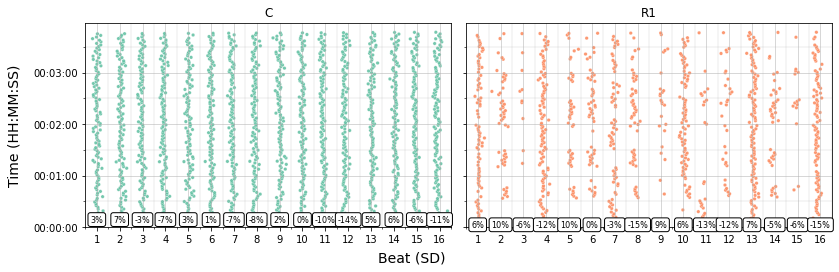

In [32]:
onsetsync.plot_by_beat(df=df, instr=['C', 'R1'], beat='SD', virtual='Iso.Time', pcols=2, griddeviations=True, colourpalette='Set2', pointsize=1)

#### Using Mean Time as reference

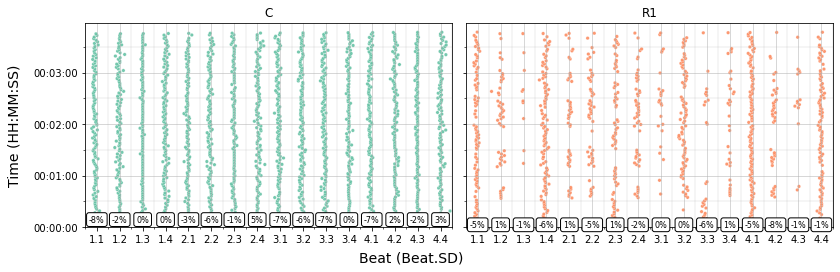

In [33]:
onsetsync.plot_by_beat(df=df, instr=['C','R1'], beat='Beat.SD', virtual='Mean.Time', pcols=2, griddeviations=True, colourpalette='Set2', pointsize=1)